In [943]:
import pandas as pd
from sklearn.impute import KNNImputer


In [944]:
housing_price_df = pd.read_csv("../data/HPI 1981-2022 by regions.csv")
housing_price_df=housing_price_df.drop(columns=["Month-year","Month-Year","Unnamed: 0"])


In [945]:
housing_price_df = housing_price_df.drop(columns=['Canada','Atlantic Region', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Quebec City, Quebec', 'Sherbrooke, Quebec', 'Trois-Rivieres, Quebec', 'Montreal, Quebec', 'Ottawa-Gatineau, Quebec part', 'Ontario ', 'Ottawa-Gatineau, Ontario part', 'Oshawa, Ontario ', 'Toronto, Ontario', 'Hamilton, Ontario', 'St. Catharines-Niagara, Ontario', 'Kitchener-Cambridge-Waterloo, Ontario', 'Guelph, Ontario', 'London, Ontario', 'Windsor, Ontario', 'Greater Sudbury, Ontario 12', 'Prairie Region', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia ', 'Kelowna, British Columbia', 'Vancouver, British Columbia', 'Victoria, British Columbia'])

In [946]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    1494 non-null   object
 1   year    1494 non-null   int64 
 2   month   1494 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 35.1+ KB


In [947]:
housing_price_df.describe()

,year,month
count,1494.000000,1494.000000
mean,2001.253012,6.463855
std,11.985769,3.453019
min,1981.000000,1.000000
25%,1991.000000,3.000000
50%,2001.000000,6.000000
75%,2012.000000,9.000000
max,2022.000000,12.000000


In [948]:
housing_price_df.isnull().sum()

Type     0
year     0
month    0
dtype: int64

In [949]:
housing_index_df = pd.read_csv("../data/INDINF_REAL_ESTATE.csv",skiprows=18)
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           173 non-null    object 
 1   INDINF_NHPI_Q  123 non-null    float64
 2   INDINF_AFFORD  172 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


In [950]:
housing_index_df['date'] = pd.to_datetime(housing_index_df['date'])


In [951]:
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           173 non-null    datetime64[ns]
 1   INDINF_NHPI_Q  123 non-null    float64       
 2   INDINF_AFFORD  172 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.2 KB


In [952]:
housing_index_df["year"], housing_index_df["month"] = housing_index_df['date'].dt.year, housing_index_df['date'].dt.month

In [953]:
housing_index_df=housing_index_df.drop(columns=["date"])

In [954]:
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INDINF_NHPI_Q  123 non-null    float64
 1   INDINF_AFFORD  172 non-null    float64
 2   year           173 non-null    int64  
 3   month          173 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 5.5 KB


In [955]:
housing_index_df.describe()

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
count,123.000000,172.000000,173.000000,173.000000
mean,2.689431,0.366419,2001.624277,5.508671
std,3.180391,0.070789,12.526850,3.356040
min,-3.100000,0.273000,1980.000000,1.000000
25%,0.900000,0.316750,1991.000000,4.000000
50%,2.100000,0.353000,2002.000000,7.000000
75%,4.350000,0.392750,2012.000000,7.000000
max,11.800000,0.646000,2023.000000,10.000000


In [956]:
housing_index_df.isnull().sum()

INDINF_NHPI_Q    50
INDINF_AFFORD     1
year              0
month             0
dtype: int64

In [957]:
housing_index_df

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
0,NaN,0.435,1980,7
1,NaN,0.476,1980,10
2,NaN,0.498,1981,1
3,NaN,0.552,1981,4
4,NaN,0.646,1981,7
...,...,...,...,...
168,6.9,0.507,2022,7
169,4.4,0.498,2022,10
170,1.4,0.497,2023,1
171,-0.5,0.502,2023,4


In [958]:
features_for_imputation = ['INDINF_NHPI_Q', 'INDINF_AFFORD', 'year', 'month']

complete_data = housing_index_df.dropna(subset=features_for_imputation)
incomplete_data = housing_index_df[housing_index_df[features_for_imputation].isnull().any(axis=1)]


knn_imputer_nhpi = KNNImputer(n_neighbors=3)
knn_imputer_nhpi.fit(complete_data[features_for_imputation])
imputed_values_nhpi = knn_imputer_nhpi.transform(incomplete_data[features_for_imputation])

housing_index_df.loc[incomplete_data.index, 'INDINF_NHPI_Q'] = imputed_values_nhpi[:, 0]

knn_imputer_afford = KNNImputer(n_neighbors=3)
knn_imputer_afford.fit(complete_data[features_for_imputation])
imputed_values_afford = knn_imputer_afford.transform(incomplete_data[features_for_imputation])

housing_index_df.loc[incomplete_data.index, 'INDINF_AFFORD'] = imputed_values_afford[:, 1]


In [959]:
housing_index_df

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
0,1.366667,0.435000,1980,7
1,0.800000,0.476000,1980,10
2,1.166667,0.498000,1981,1
3,1.333333,0.552000,1981,4
4,1.366667,0.646000,1981,7
...,...,...,...,...
168,6.900000,0.507000,2022,7
169,4.400000,0.498000,2022,10
170,1.400000,0.497000,2023,1
171,-0.500000,0.502000,2023,4


In [960]:
housing_index_df.isnull().sum()

INDINF_NHPI_Q    0
INDINF_AFFORD    0
year             0
month            0
dtype: int64

In [961]:
housing_price_df

,Type,year,month
0,House and Land,1981,1
1,House and Land,1981,2
2,House and Land,1981,3
3,House and Land,1981,4
4,House and Land,1981,5
...,...,...,...
1489,Land only,2022,2
1490,Land only,2022,3
1491,Land only,2022,4
1492,Land only,2022,5


In [962]:
merged_df = pd.merge(housing_price_df, housing_index_df, on=['year', 'month'], how='outer')
merged_df

,Type,year,month,INDINF_NHPI_Q,INDINF_AFFORD
0,House and Land,1981,1,1.166667,0.498000
1,House only,1981,1,1.166667,0.498000
2,Land only,1981,1,1.166667,0.498000
3,House and Land,1981,2,NaN,NaN
4,House only,1981,2,NaN,NaN
...,...,...,...,...,...
1496,NaN,2022,7,6.900000,0.507000
1497,NaN,2022,10,4.400000,0.498000
1498,NaN,2023,1,1.400000,0.497000
1499,NaN,2023,4,-0.500000,0.502000


In [963]:
merged_df = pd.get_dummies(merged_df, columns=['Type'], prefix='Type')

In [964]:
merged_df

,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only
0,1981,1,1.166667,0.498000,1,0,0
1,1981,1,1.166667,0.498000,0,1,0
2,1981,1,1.166667,0.498000,0,0,1
3,1981,2,NaN,NaN,1,0,0
4,1981,2,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...
1496,2022,7,6.900000,0.507000,0,0,0
1497,2022,10,4.400000,0.498000,0,0,0
1498,2023,1,1.400000,0.497000,0,0,0
1499,2023,4,-0.500000,0.502000,0,0,0


In [965]:
merged_df.isnull().sum()

year                     0
month                    0
INDINF_NHPI_Q          996
INDINF_AFFORD          996
Type_House and Land      0
Type_House only          0
Type_Land only           0
dtype: int64

In [966]:
import pandas as pd
from sklearn.impute import KNNImputer

features_for_imputation = ['INDINF_NHPI_Q', 'INDINF_AFFORD', 'year', 'month']

complete_data = merged_df.dropna(subset=features_for_imputation)
incomplete_data = merged_df[merged_df[features_for_imputation].isnull().any(axis=1)]


knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(complete_data[features_for_imputation])
imputed_values = knn_imputer.transform(incomplete_data[features_for_imputation])

merged_df.loc[incomplete_data.index, ['INDINF_NHPI_Q', 'INDINF_AFFORD']] = imputed_values[:, :2]


In [967]:
import pandas as pd


merged_df['quarter'] = pd.to_datetime(merged_df['year'].astype(str) + '-' + merged_df['month'].astype(str) + '-1').dt.quarter
merged_df = merged_df.sort_values(['year', 'quarter'], ascending=[True, True])

merged_df['INDINF_NHPI_Q'] = merged_df['INDINF_NHPI_Q'].fillna(method='ffill')
merged_df['INDINF_AFFORD'] = merged_df['INDINF_AFFORD'].fillna(method='ffill')

merged_df = merged_df.drop('quarter', axis=1)


In [968]:
merged_df

,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only
1494,1980,7,1.366667,0.435000,0,0,0
1495,1980,10,0.800000,0.476000,0,0,0
0,1981,1,1.166667,0.498000,1,0,0
1,1981,1,1.166667,0.498000,0,1,0
2,1981,1,1.166667,0.498000,0,0,1
...,...,...,...,...,...,...,...
1496,2022,7,6.900000,0.507000,0,0,0
1497,2022,10,4.400000,0.498000,0,0,0
1498,2023,1,1.400000,0.497000,0,0,0
1499,2023,4,-0.500000,0.502000,0,0,0


In [969]:
merged_df.isnull().sum()

year                   0
month                  0
INDINF_NHPI_Q          0
INDINF_AFFORD          0
Type_House and Land    0
Type_House only        0
Type_Land only         0
dtype: int64

In [970]:
import requests
import pandas as pd
from io import StringIO  
from bs4 import BeautifulSoup



api_url = f'https://www.bankofcanada.ca/rates/interest-rates/key-interest-rates/?lookupPage=lookup_key_interest.php&startRange=1935-01-01&searchDiff=&searchValue=&searchType=dates&dFrom=1981-01-01&dTo=2023-11-15&submit=Submit'

response = requests.get(api_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    #print(response.text)
   
    data_list = []
    for row in soup.find_all('tr')[1:]:
        columns = row.find_all('td')
        data_list.append([col.text.strip() for col in columns])
   
else:
    print(f"Error: {response.status_code}")


In [971]:
df = pd.DataFrame(data_list, columns=['Date', 'Bank rate', 'Change', 'Target for the overnight rate','Change'])  # Replace with actual column names


In [972]:
df


,Date,Bank rate,Change,Target for the overnight rate,Change
0,1981-01-08,17.00,-0.26,9.00,0.25
1,1981-01-15,16.97,-0.03,7.50,-0.63
2,1981-01-22,17.00,0.03,7.13,0.25
3,1981-01-29,17.11,0.11,6.94,0.13
4,1981-02-12,17.15,0.04,7.00,0.00
...,...,...,...,...,...
835,2022-12-08,4.50,0.50,,
836,2023-01-26,4.75,0.25,,
837,2023-06-08,5.00,0.25,,
838,2023-06-12,4.75,-0.25,,


In [973]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df = df.drop(columns=["Date","Change","Target for the overnight rate","Change"])


In [974]:
df.columns = map(str.lower, df.columns)

df


,bank rate,year,month
0,17.00,1981,1
1,16.97,1981,1
2,17.00,1981,1
3,17.11,1981,1
4,17.15,1981,2
...,...,...,...
835,4.50,2022,12
836,4.75,2023,1
837,5.00,2023,6
838,4.75,2023,6


In [975]:
result_df = pd.merge(df, merged_df, on=['year', 'month'], how='inner')

result_df

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only
0,17.00,1981,1,1.166667,0.498000,1,0,0
1,17.00,1981,1,1.166667,0.498000,0,1,0
2,17.00,1981,1,1.166667,0.498000,0,0,1
3,16.97,1981,1,1.166667,0.498000,1,0,0
4,16.97,1981,1,1.166667,0.498000,0,1,0
...,...,...,...,...,...,...,...,...
2495,1.75,2022,6,8.280000,0.414733,0,0,1
2496,2.75,2022,7,6.900000,0.507000,0,0,0
2497,4.00,2022,10,4.400000,0.498000,0,0,0
2498,4.75,2023,1,1.400000,0.497000,0,0,0


In [976]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['bank rate', 'INDINF_NHPI_Q','INDINF_AFFORD']

result_df[columns_to_scale] = scaler.fit_transform(result_df[columns_to_scale])


result_df


,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only
0,0.795564,1981,1,0.349727,0.603217,1,0,0
1,0.795564,1981,1,0.349727,0.603217,0,1,0
2,0.795564,1981,1,0.349727,0.603217,0,0,1
3,0.794118,1981,1,0.349727,0.603217,1,0,0
4,0.794118,1981,1,0.349727,0.603217,0,1,0
...,...,...,...,...,...,...,...,...
2495,0.060270,2022,6,0.932787,0.379982,0,0,1
2496,0.108486,2022,7,0.819672,0.627346,0,0,0
2497,0.168756,2022,10,0.614754,0.603217,0,0,0
2498,0.204918,2023,1,0.368852,0.600536,0,0,0


In [977]:
result_df.isnull().sum()

bank rate              0
year                   0
month                  0
INDINF_NHPI_Q          0
INDINF_AFFORD          0
Type_House and Land    0
Type_House only        0
Type_Land only         0
dtype: int64

In [978]:
rows_to_skip_before = list(range(0, 11))  
rows_to_skip_after = list(range(16, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after

df_gdp = pd.read_csv("../data/GDP expenditure.csv", skiprows=rows_to_skip)
df_gdp

,Estimates,Q1 1981,Q2 1981,Q3 1981,Q4 1981,Q1 1982,Q2 1982,Q3 1982,Q4 1982,Q1 1983,...,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023
0,Final consumption expenditure,"658,323","657,303","656,993","658,411","649,659","647,902","647,861","646,843","649,730",...,"1,624,927","1,623,089","1,680,135","1,687,843","1,697,545","1,720,778","1,727,406","1,733,537","1,743,976","1,748,253"
1,Household final consumption expenditure,"430,710","430,309","428,039","429,061","422,690","419,347","417,718","416,226","422,142",...,"1,142,579","1,136,728","1,191,441","1,195,266","1,201,060","1,227,276","1,228,166","1,231,439","1,245,808","1,246,449"
2,Non-profit institutions serving households' fi...,"8,660","8,479","8,314","8,157","7,859","7,718","7,749","7,757","7,749",...,"31,672","31,752","32,400","33,052","33,348","33,828","34,072","34,216","34,984","35,652"
3,General governments final consumption expenditure,"226,086","225,644","228,400","229,023","227,096","229,417","231,372","232,030","228,008",...,"449,278","452,926","455,362","458,519","462,068","459,111","464,446","467,115","462,718","465,615"


In [979]:
melted_df = pd.melt(df_gdp, id_vars=['Estimates'], var_name='Year_Quarter', value_name='Value')
melted_df[['Quarter', 'Year']] = melted_df['Year_Quarter'].str.split(' ', expand=True)
melted_df = melted_df[['Estimates', 'Year', 'Quarter', 'Value']]
melted_df

,Estimates,Year,Quarter,Value
0,Final consumption expenditure,1981,Q1,"658,323"
1,Household final consumption expenditure,1981,Q1,"430,710"
2,Non-profit institutions serving households' fi...,1981,Q1,"8,660"
3,General governments final consumption expenditure,1981,Q1,"226,086"
4,Final consumption expenditure,1981,Q2,"657,303"
...,...,...,...,...
675,General governments final consumption expenditure,2023,Q1,"462,718"
676,Final consumption expenditure,2023,Q2,"1,748,253"
677,Household final consumption expenditure,2023,Q2,"1,246,449"
678,Non-profit institutions serving households' fi...,2023,Q2,"35,652"


In [980]:
quarter_to_months = {'Q1': [1, 2, 3], 'Q2': [4, 5, 6], 'Q3': [7, 8, 9], 'Q4': [10, 11, 12]}

melted_df['Month'] = melted_df['Quarter'].map(quarter_to_months)

df_expanded_gdp = melted_df.explode('Month')

df_expanded_gdp['Month'] = pd.to_numeric(df_expanded_gdp['Month'])

df_expanded_gdp.sort_values(['Year', 'Month'], inplace=True)

df_expanded_gdp.reset_index(drop=True, inplace=True)

df_expanded_gdp = df_expanded_gdp.drop(columns=["Quarter"])
df_expanded_gdp

,Estimates,Year,Value,Month
0,Final consumption expenditure,1981,"658,323",1
1,Household final consumption expenditure,1981,"430,710",1
2,Non-profit institutions serving households' fi...,1981,"8,660",1
3,General governments final consumption expenditure,1981,"226,086",1
4,Final consumption expenditure,1981,"658,323",2
...,...,...,...,...
2035,General governments final consumption expenditure,2023,"465,615",5
2036,Final consumption expenditure,2023,"1,748,253",6
2037,Household final consumption expenditure,2023,"1,246,449",6
2038,Non-profit institutions serving households' fi...,2023,"35,652",6


In [981]:
df_expanded_gdp.columns = map(str.lower, df_expanded_gdp.columns)

df_expanded_gdp


,estimates,year,value,month
0,Final consumption expenditure,1981,"658,323",1
1,Household final consumption expenditure,1981,"430,710",1
2,Non-profit institutions serving households' fi...,1981,"8,660",1
3,General governments final consumption expenditure,1981,"226,086",1
4,Final consumption expenditure,1981,"658,323",2
...,...,...,...,...
2035,General governments final consumption expenditure,2023,"465,615",5
2036,Final consumption expenditure,2023,"1,748,253",6
2037,Household final consumption expenditure,2023,"1,246,449",6
2038,Non-profit institutions serving households' fi...,2023,"35,652",6


In [982]:
rows_to_skip_before = list(range(0, 12))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(14, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
df_unemployment=pd.read_csv("../data/unemployment rate.csv",skiprows=rows_to_skip)

In [983]:
df_unemployment= df_unemployment.drop(columns=["Data type"])

In [984]:
df_unemployment

,Labour force characteristics,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Unemployment rate 14,7.4,7.4,7.4,7.1,7.2,7.2,7.2,7.1,8.1,...,5,5,5,5,5.2,5.4,5.5,5.5,5.5,5.7


In [985]:

df_unemployment_long = pd.melt(df_unemployment, id_vars=['Labour force characteristics'], var_name='Month_Year', value_name='Unemployment_rate')

df_unemployment_long[['Month', 'Year']] = df_unemployment_long['Month_Year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_unemployment_long['Month'] = df_unemployment_long['Month'].map(month_mapping)

df_unemployment_long = df_unemployment_long.drop(columns=['Month_Year'])

df_unemployment_long = df_unemployment_long.drop(columns=["Labour force characteristics"])
df_unemployment_long

,Unemployment_rate,Month,Year
0,7.4,1,81
1,7.4,2,81
2,7.4,3,81
3,7.1,4,81
4,7.2,5,81
...,...,...,...
509,5.4,6,23
510,5.5,7,23
511,5.5,8,23
512,5.5,9,23


In [986]:
df_unemployment_long.columns = map(str.lower, df_unemployment_long.columns)

df_unemployment_long


,unemployment_rate,month,year
0,7.4,1,81
1,7.4,2,81
2,7.4,3,81
3,7.1,4,81
4,7.2,5,81
...,...,...,...
509,5.4,6,23
510,5.5,7,23
511,5.5,8,23
512,5.5,9,23


In [987]:
df_unemployment_long['year'] = df_unemployment_long['year'].apply(lambda x: int('20' + x) if int(x) < 50 else int('19' + x))


In [988]:
df_unemployment_long

,unemployment_rate,month,year
0,7.4,1,1981
1,7.4,2,1981
2,7.4,3,1981
3,7.1,4,1981
4,7.2,5,1981
...,...,...,...
509,5.4,6,2023
510,5.5,7,2023
511,5.5,8,2023
512,5.5,9,2023


In [989]:
df_unemployment_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unemployment_rate  514 non-null    float64
 1   month              514 non-null    int64  
 2   year               514 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.2 KB


In [990]:
rows_to_skip_before = list(range(0, 10))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(12, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
pd_houshold_saving = pd.read_csv("../data/household saving rate.csv",skiprows=rows_to_skip)

In [991]:
pd_houshold_saving

,Estimates,Q1 1981,Q2 1981,Q3 1981,Q4 1981,Q1 1982,Q2 1982,Q3 1982,Q4 1982,Q1 1983,...,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023
0,Household saving rate 4,16.4,17.3,17.8,18.2,21.6,21.3,20.2,18.6,16.6,...,14,14.1,9.3,6.5,8.8,5.1,4.7,5.8,3.7,5.1


In [992]:
df_saving_long = pd.melt(pd_houshold_saving, id_vars=['Estimates'], var_name='Quarter_Year', value_name='Household_saving_rate')

df_saving_long[['Quarter', 'Year']] = df_saving_long['Quarter_Year'].str.split(' ', expand=True)

quarter_mapping = {
    'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4
}

df_saving_long['Quarter'] = df_saving_long['Quarter'].map(quarter_mapping)

df_saving_long = df_saving_long.drop(columns=['Quarter_Year','Estimates'])
df_saving_long

,Household_saving_rate,Quarter,Year
0,16.4,1,1981
1,17.3,2,1981
2,17.8,3,1981
3,18.2,4,1981
4,21.6,1,1982
...,...,...,...
165,5.1,2,2022
166,4.7,3,2022
167,5.8,4,2022
168,3.7,1,2023


In [993]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

df_saving_long['month'] = df_saving_long['Quarter'].map(quarter_to_month)

df_saving_long = df_saving_long.drop(columns=['Quarter'])
df_saving_long

,Household_saving_rate,Year,month
0,16.4,1981,1
1,17.3,1981,4
2,17.8,1981,7
3,18.2,1981,10
4,21.6,1982,1
...,...,...,...
165,5.1,2022,4
166,4.7,2022,7
167,5.8,2022,10
168,3.7,2023,1


In [994]:
df_saving_long.columns = map(str.lower, df_saving_long.columns)

df_saving_long


,household_saving_rate,year,month
0,16.4,1981,1
1,17.3,1981,4
2,17.8,1981,7
3,18.2,1981,10
4,21.6,1982,1
...,...,...,...
165,5.1,2022,4
166,4.7,2022,7
167,5.8,2022,10
168,3.7,2023,1


In [995]:
import numpy as np
df_expanded_gdp["year"]=df_expanded_gdp["year"].astype(np.int64)

In [996]:
df_saving_long["year"]=df_saving_long["year"].astype(np.int64)

In [997]:
print(result_df[['year', 'month']].dtypes)
print(df_expanded_gdp[['year', 'month']].dtypes)
print(df_unemployment_long[['year', 'month']].dtypes)
print(df_saving_long[['year', 'month']].dtypes)


year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object


In [998]:
df_unemployment_long.describe()

,unemployment_rate,month,year
count,514.000000,514.000000,514.000000
mean,8.138521,6.480545,2001.918288
std,1.845038,3.447830,12.376373
min,4.900000,1.000000,1981.000000
25%,6.900000,3.250000,1991.000000
50%,7.600000,6.000000,2002.000000
75%,9.475000,9.000000,2013.000000
max,14.100000,12.000000,2023.000000


In [999]:
merged_df1 = pd.merge(result_df, df_expanded_gdp, how='inner', on=['year', 'month'])
merged_df1


,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only,estimates,value
0,0.795564,1981,1,0.349727,0.603217,1,0,0,Final consumption expenditure,"658,323"
1,0.795564,1981,1,0.349727,0.603217,1,0,0,Household final consumption expenditure,"430,710"
2,0.795564,1981,1,0.349727,0.603217,1,0,0,Non-profit institutions serving households' fi...,"8,660"
3,0.795564,1981,1,0.349727,0.603217,1,0,0,General governments final consumption expenditure,"226,086"
4,0.795564,1981,1,0.349727,0.603217,0,1,0,Final consumption expenditure,"658,323"
...,...,...,...,...,...,...,...,...,...,...
9991,0.168756,2022,10,0.614754,0.603217,0,0,0,General governments final consumption expenditure,"467,115"
9992,0.204918,2023,1,0.368852,0.600536,0,0,0,Final consumption expenditure,"1,743,976"
9993,0.204918,2023,1,0.368852,0.600536,0,0,0,Household final consumption expenditure,"1,245,808"
9994,0.204918,2023,1,0.368852,0.600536,0,0,0,Non-profit institutions serving households' fi...,"34,984"


In [1000]:
merged_df1.isnull().sum()

bank rate              0
year                   0
month                  0
INDINF_NHPI_Q          0
INDINF_AFFORD          0
Type_House and Land    0
Type_House only        0
Type_Land only         0
estimates              0
value                  0
dtype: int64

In [1001]:
merged_df2 = pd.merge(merged_df1, df_unemployment_long, how='inner', on=['year', 'month'])
merged_df2

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only,estimates,value,unemployment_rate
0,0.795564,1981,1,0.349727,0.603217,1,0,0,Final consumption expenditure,"658,323",7.4
1,0.795564,1981,1,0.349727,0.603217,1,0,0,Household final consumption expenditure,"430,710",7.4
2,0.795564,1981,1,0.349727,0.603217,1,0,0,Non-profit institutions serving households' fi...,"8,660",7.4
3,0.795564,1981,1,0.349727,0.603217,1,0,0,General governments final consumption expenditure,"226,086",7.4
4,0.795564,1981,1,0.349727,0.603217,0,1,0,Final consumption expenditure,"658,323",7.4
...,...,...,...,...,...,...,...,...,...,...,...
9991,0.168756,2022,10,0.614754,0.603217,0,0,0,General governments final consumption expenditure,"467,115",5.2
9992,0.204918,2023,1,0.368852,0.600536,0,0,0,Final consumption expenditure,"1,743,976",5.0
9993,0.204918,2023,1,0.368852,0.600536,0,0,0,Household final consumption expenditure,"1,245,808",5.0
9994,0.204918,2023,1,0.368852,0.600536,0,0,0,Non-profit institutions serving households' fi...,"34,984",5.0


In [1002]:
merged_df2.isnull().sum()

bank rate              0
year                   0
month                  0
INDINF_NHPI_Q          0
INDINF_AFFORD          0
Type_House and Land    0
Type_House only        0
Type_Land only         0
estimates              0
value                  0
unemployment_rate      0
dtype: int64

In [1003]:
final_merged_df = pd.merge(merged_df2, df_saving_long, how='inner', on=['year', 'month'])


In [1004]:
final_merged_df

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only,estimates,value,unemployment_rate,household_saving_rate
0,0.795564,1981,1,0.349727,0.603217,1,0,0,Final consumption expenditure,"658,323",7.4,16.4
1,0.795564,1981,1,0.349727,0.603217,1,0,0,Household final consumption expenditure,"430,710",7.4,16.4
2,0.795564,1981,1,0.349727,0.603217,1,0,0,Non-profit institutions serving households' fi...,"8,660",7.4,16.4
3,0.795564,1981,1,0.349727,0.603217,1,0,0,General governments final consumption expenditure,"226,086",7.4,16.4
4,0.795564,1981,1,0.349727,0.603217,0,1,0,Final consumption expenditure,"658,323",7.4,16.4
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,0.168756,2022,10,0.614754,0.603217,0,0,0,General governments final consumption expenditure,"467,115",5.2,5.8
3524,0.204918,2023,1,0.368852,0.600536,0,0,0,Final consumption expenditure,"1,743,976",5.0,3.7
3525,0.204918,2023,1,0.368852,0.600536,0,0,0,Household final consumption expenditure,"1,245,808",5.0,3.7
3526,0.204918,2023,1,0.368852,0.600536,0,0,0,Non-profit institutions serving households' fi...,"34,984",5.0,3.7


In [1005]:
final_merged_df.isnull().sum()

bank rate                0
year                     0
month                    0
INDINF_NHPI_Q            0
INDINF_AFFORD            0
Type_House and Land      0
Type_House only          0
Type_Land only           0
estimates                0
value                    0
unemployment_rate        0
household_saving_rate    0
dtype: int64

In [1006]:
final_merged_df_no_duplicates = final_merged_df.drop_duplicates(
    subset=['bank rate', 'year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 'Type_House and Land', 'Type_House only',
            'Type_Land only','unemployment_rate','household_saving_rate','estimates', 'value'])

dfs_by_estimate = {}
for estimate, group_df in final_merged_df_no_duplicates.groupby('estimates'):
    dfs_by_estimate[estimate] = group_df[['bank rate','unemployment_rate','household_saving_rate','year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 'Type_House and Land', 'Type_House only', 'Type_Land only', 'value']].rename(columns={'value': estimate})

merged_df = dfs_by_estimate['Final consumption expenditure']  # Initialize with the first DataFrame
for estimate, df in dfs_by_estimate.items():
    if estimate != 'Final consumption expenditure':
        merged_df = pd.merge(merged_df, df, on=['bank rate', 'year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 'Type_House and Land', 'Type_House only', 'Type_Land only','unemployment_rate','household_saving_rate'], how='outer')



In [1007]:
merged_df.isnull().sum()

bank rate                                                                    0
unemployment_rate                                                            0
household_saving_rate                                                        0
year                                                                         0
month                                                                        0
INDINF_NHPI_Q                                                                0
INDINF_AFFORD                                                                0
Type_House and Land                                                          0
Type_House only                                                              0
Type_Land only                                                               0
Final consumption expenditure                                                0
General governments final consumption expenditure                            0
Household final consumption expenditure             

In [1008]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 14 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   bank rate                                                                  855 non-null    float64
 1   unemployment_rate                                                          855 non-null    float64
 2   household_saving_rate                                                      855 non-null    float64
 3   year                                                                       855 non-null    int64  
 4   month                                                                      855 non-null    int64  
 5   INDINF_NHPI_Q                                                              855 non-null    float64
 6   INDINF_AFFORD                                             

In [1009]:
merged_df["Final consumption expenditure"] = merged_df["Final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["General governments final consumption expenditure"] = merged_df["General governments final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Household final consumption expenditure"] = merged_df["Household final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Non-profit institutions serving households' final consumption expenditure"] = merged_df["Non-profit institutions serving households' final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Final consumption expenditure"] = merged_df["Final consumption expenditure"].astype(float)
merged_df["General governments final consumption expenditure"] = merged_df["General governments final consumption expenditure"].astype(float)
merged_df["Household final consumption expenditure"] = merged_df["Household final consumption expenditure"].astype(float)
merged_df["Non-profit institutions serving households' final consumption expenditure"] = merged_df["Non-profit institutions serving households' final consumption expenditure"].astype(float)

In [1010]:

scaler = MinMaxScaler()

columns_to_scale = ['Final consumption expenditure','unemployment_rate','household_saving_rate','General governments final consumption expenditure','Household final consumption expenditure','Non-profit institutions serving households\' final consumption expenditure']

merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

In [1011]:
merged_df.describe()

,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Type_House and Land,Type_House only,Type_Land only,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.408967,0.568085,0.570706,1990.608187,5.385965,0.338913,0.353141,0.332164,0.332164,0.332164,0.169153,0.190635,0.168655,0.148543
std,0.196040,0.213898,0.208265,7.859699,3.374486,0.122282,0.212006,0.471265,0.471265,0.471265,0.173507,0.159180,0.175570,0.188583
min,0.000000,0.000000,0.000000,1981.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.275313,0.375000,0.479263,1985.000000,1.000000,0.319672,0.211796,0.000000,0.000000,0.000000,0.065267,0.089046,0.068531,0.030013
50%,0.396818,0.587500,0.571429,1989.000000,4.000000,0.349727,0.310992,0.000000,0.000000,0.000000,0.155026,0.188987,0.152282,0.073667
75%,0.515911,0.737500,0.686636,1994.000000,7.000000,0.363388,0.471850,1.000000,1.000000,1.000000,0.192357,0.243669,0.188671,0.164638
max,0.966249,1.000000,1.000000,2023.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


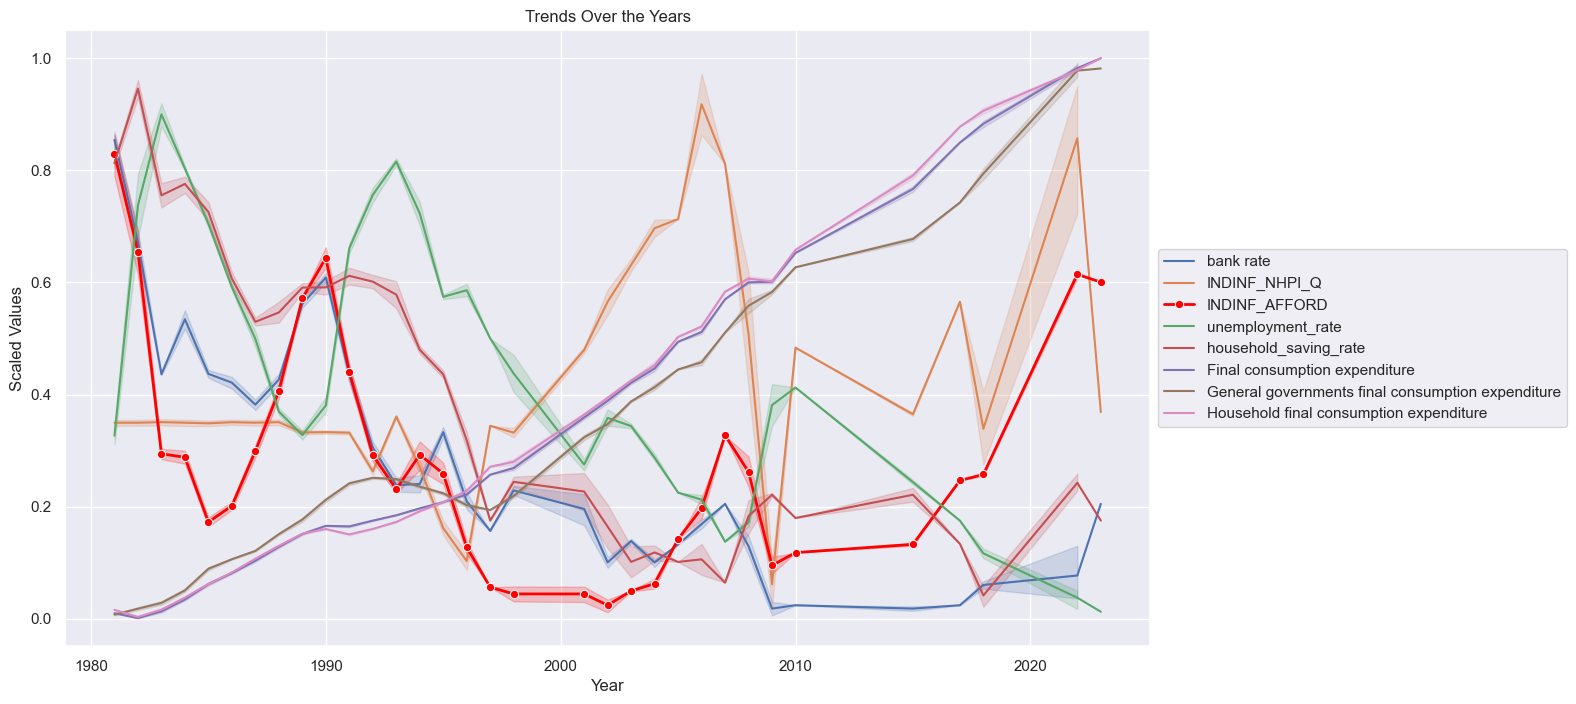

In [1012]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))

features_to_plot = ['bank rate', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 
                    'unemployment_rate', 'household_saving_rate', 
                    'Final consumption expenditure', 
                    'General governments final consumption expenditure', 
                    'Household final consumption expenditure']

for feature in features_to_plot:
    if feature == 'INDINF_AFFORD':
        sns.lineplot(x='year', y=feature, data=merged_df, label=feature, marker='o', color='red', linewidth=2)
    else:
        sns.lineplot(x='year', y=feature, data=merged_df, label=feature)

plt.title('Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Scaled Values')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [1013]:
correlation_matrix = merged_df[['bank rate', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 
                    'unemployment_rate', 'household_saving_rate', 
                    'Final consumption expenditure', 
                    'General governments final consumption expenditure', 
                    'Household final consumption expenditure']].corr()

correlation_matrix


,bank rate,INDINF_NHPI_Q,INDINF_AFFORD,unemployment_rate,household_saving_rate,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure
bank rate,1.000000,-0.095590,0.821256,-0.018706,0.792900,-0.702222,-0.719159,-0.693404
INDINF_NHPI_Q,-0.095590,1.000000,0.008065,-0.346307,-0.209910,0.328772,0.282802,0.335925
INDINF_AFFORD,0.821256,0.008065,1.000000,-0.275203,0.541528,-0.322975,-0.315855,-0.321251
unemployment_rate,-0.018706,-0.346307,-0.275203,1.000000,0.478909,-0.517172,-0.433965,-0.533315
household_saving_rate,0.792900,-0.209910,0.541528,0.478909,1.000000,-0.825803,-0.791660,-0.827054
Final consumption expenditure,-0.702222,0.328772,-0.322975,-0.517172,-0.825803,1.000000,0.979611,0.999003
General governments final consumption expenditure,-0.719159,0.282802,-0.315855,-0.433965,-0.791660,0.979611,1.000000,0.969966
Household final consumption expenditure,-0.693404,0.335925,-0.321251,-0.533315,-0.827054,0.999003,0.969966,1.000000


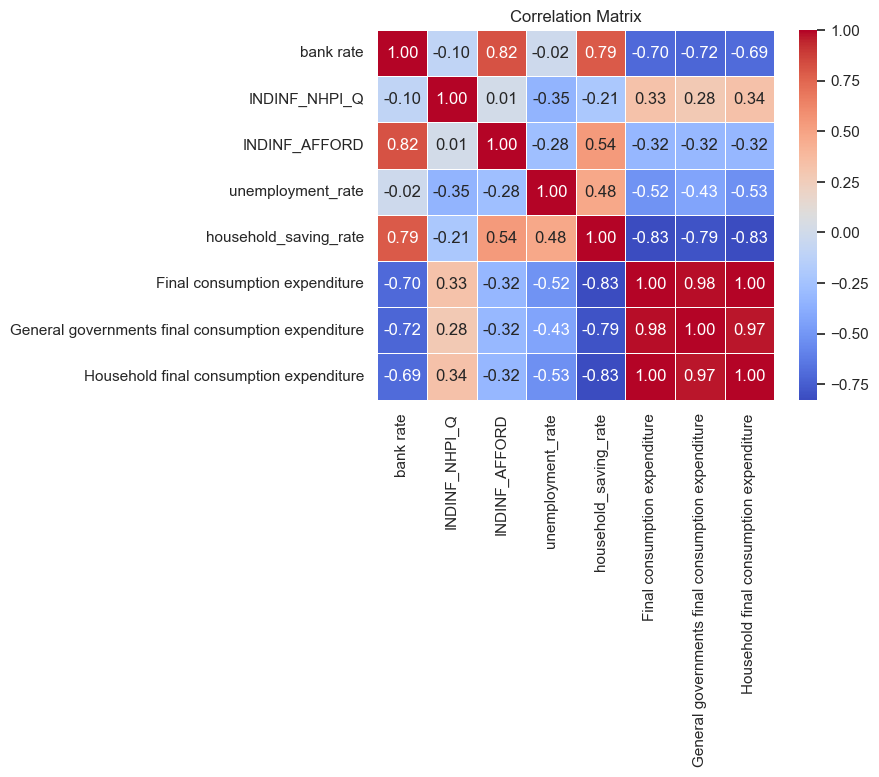

In [1014]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')

plt.show()

In [1015]:
from sklearn.ensemble import RandomForestRegressor

features = ['bank rate', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 
                    'unemployment_rate', 'household_saving_rate', 
                    'Final consumption expenditure', 
                    'General governments final consumption expenditure', 
                    'Household final consumption expenditure']
target = 'INDINF_AFFORD'

X = merged_df[features]
y = merged_df[target]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
2,INDINF_AFFORD,0.985663
0,bank rate,0.011442
1,INDINF_NHPI_Q,0.000727
4,household_saving_rate,0.000674
6,General governments final consumption expenditure,0.000462
5,Final consumption expenditure,0.000423
3,unemployment_rate,0.000340
7,Household final consumption expenditure,0.000269


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

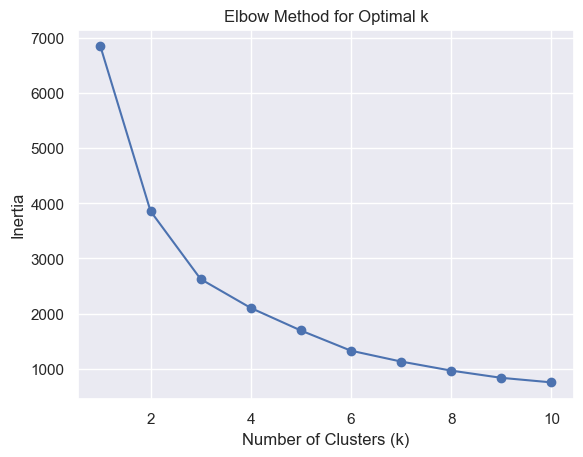

In [1016]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_for_clustering = ['bank rate', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 
                    'unemployment_rate', 'household_saving_rate', 
                    'Final consumption expenditure', 
                    'General governments final consumption expenditure', 
                    'Household final consumption expenditure']

scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(merged_df[features_for_clustering])

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


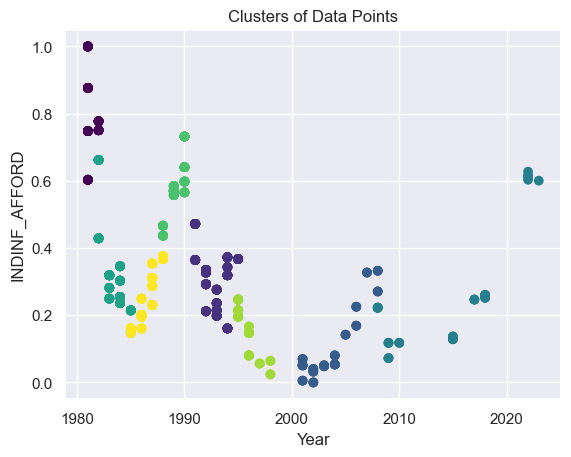

In [1017]:
optimal_k = 8  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['Cluster_Labels'] = kmeans.fit_predict(data_for_clustering)

plt.scatter(merged_df['year'], merged_df['INDINF_AFFORD'], c=merged_df['Cluster_Labels'], cmap='viridis')
plt.title('Clusters of Data Points')
plt.xlabel('Year')
plt.ylabel('INDINF_AFFORD')
plt.show()


In [1018]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_for_clustering)


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [1019]:
merged_df.columns

Index(['bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
       'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 'Type_House and Land',
       'Type_House only', 'Type_Land only', 'Final consumption expenditure',
       'General governments final consumption expenditure',
       'Household final consumption expenditure',
       'Non-profit institutions serving households' final consumption expenditure',
       'Cluster_Labels'],
      dtype='object')

In [1020]:
# Assuming your dataframe is named 'merged_df'
new_order = ['INDINF_AFFORD', 'bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
             'month', 'INDINF_NHPI_Q', 'Type_House and Land', 'Type_House only', 'Type_Land only',
             'Final consumption expenditure', 'General governments final consumption expenditure',
             'Household final consumption expenditure',
             'Non-profit institutions serving households\' final consumption expenditure', 'Cluster_Labels']

merged_df = merged_df[new_order]


In [1021]:
cluster_centers = kmeans.cluster_centers_
feature_names = merged_df.columns[1:]  
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} Characteristics:")
    for feature, value in zip(feature_names, center):
        print(f"   {feature}: {value}")


Cluster 1 Characteristics:
   bank rate: 2.0305462221501465
   unemployment_rate: 0.10568324723507881
   household_saving_rate: 2.1535817117680454
   year: -0.8267601832062448
   month: 1.4297999475687622
   INDINF_NHPI_Q: -0.9328531669699504
   Type_House and Land: -1.14534163208246
   Type_House only: -0.8883966613411308
Cluster 2 Characteristics:
   bank rate: -0.5702123901432227
   unemployment_rate: -0.3529770094469405
   household_saving_rate: -0.21630244684153513
   year: 0.792502106435144
   month: -0.06757652184123729
   INDINF_NHPI_Q: 0.07926990168195476
   Type_House and Land: 0.3451348749324323
   Type_House only: 0.017327370918379645
Cluster 3 Characteristics:
   bank rate: -1.33540962389381
   unemployment_rate: 2.5477301900257983
   household_saving_rate: -1.1415865162098435
   year: -1.403497430813085
   month: -2.048174588606906
   INDINF_NHPI_Q: 1.610733792403585
   Type_House and Land: 1.3510778692441816
   Type_House only: 1.635186928553432
Cluster 4 Characteristics

In [1022]:
new_data_point = pd.DataFrame({
    'bank rate': [0.8],
    'INDINF_NHPI_Q': [0.3],
    'INDINF_AFFORD': [0.9],
    'Final consumption expenditure': [700000],  
    'General governments final consumption expenditure': [200000], 
    'Household final consumption expenditure': [500000],
    'unemployment_rate': [0.8],
    'household_saving_rate':[0.8]
})

new_data_point_label = kmeans.predict(new_data_point)

new_data_point['Cluster_Label'] = new_data_point_label


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [1023]:
new_data_point

,bank rate,INDINF_NHPI_Q,INDINF_AFFORD,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,unemployment_rate,household_saving_rate,Cluster_Label
0,0.8,0.3,0.9,700000,200000,500000,0.8,0.8,4
